**Sentiment Analysis on sentiment labelled sentences using dataset(yelp_labelled.txt)**

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing dataset**

In [ ]:
data = pd.read_table('/content/yelp_labelled.txt')

**Reading the dataset**

In [ ]:
data.head()

,Wow... Loved this place.,1
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


Pre-processing of Text

In [ ]:
data.columns = ['Label','Sentiment']

In [ ]:
data.head()

,Label,Sentiment
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [ ]:
len(data)

999

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      999 non-null    object
 1   Sentiment  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
data.isna().sum()

Label        0
Sentiment    0
dtype: int64

In [ ]:
data['Label'].value_counts()

The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
Crust is not good.                                                                                                                        1
                                                                                                                                         ..
The burger... I got the "Gold Standard" a $17 burger and was kind of disappointed.                                                        1
OMG, the food was de

In [ ]:
y=data['Sentiment'].values
y.shape

(999,)

In [ ]:
x=data['Label'].values
x.shape

(999,)

In [ ]:
data = data[['Label', 'Sentiment']]
data.columns = ['Text','Sentiment']

**Removing Punctuations**

In [ ]:
import string
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def remove_puntuations(text):
    return text.translate(str.maketrans('','',punct))

data['text_punct'] = data['Text'].apply(remove_puntuations)

In [ ]:
data.head()

,Text,Sentiment,text_punct
0,Crust is not good.,0,Crust is not good
1,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty
2,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
3,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...
4,Now I am getting angry and I want my damn pho.,0,Now I am getting angry and I want my damn pho


**Removing Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stopwords_set = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stopwords_set])

data['text_stopword'] = data['text_punct'].apply(remove_stopwords)

In [ ]:
data.head()

,Text,Sentiment,text_punct,text_stopword
0,Crust is not good.,0,Crust is not good,Crust good
1,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,Not tasty texture nasty
2,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...
3,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,The selection menu great prices
4,Now I am getting angry and I want my damn pho.,0,Now I am getting angry and I want my damn pho,Now I getting angry I want damn pho


**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data['text_stem'] = data['text_punct'].apply(lambda x: stem_words(x))

In [ ]:
data.head()

,Text,Sentiment,text_punct,text_stopword,text_stem
0,Crust is not good.,0,Crust is not good,Crust good,crust is not good
1,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,Not tasty texture nasty,not tasti and the textur wa just nasti
2,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...,stop by dure the late may bank holiday off ric...
3,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,The selection menu great prices,the select on the menu wa great and so were th...
4,Now I am getting angry and I want my damn pho.,0,Now I am getting angry and I want my damn pho,Now I getting angry I want damn pho,now i am get angri and i want my damn pho


**Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_words(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
data['text_lemma'] = data['text_stem'].apply(lambda text: lemmatize_words(text))

In [ ]:
data.head()

,Text,Sentiment,text_punct,text_stopword,text_stem,text_lemma
0,Crust is not good.,0,Crust is not good,Crust good,crust is not good,"[crust, is, not, good]"
1,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,Not tasty texture nasty,not tasti and the textur wa just nasti,"[not, tasti, and, the, textur, wa, just, nasti]"
2,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,Stopped late May bank holiday Rick Steve recom...,stop by dure the late may bank holiday off ric...,"[stop, by, dure, the, late, may, bank, holiday..."
3,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,The selection menu great prices,the select on the menu wa great and so were th...,"[the, select, on, the, menu, wa, great, and, s..."
4,Now I am getting angry and I want my damn pho.,0,Now I am getting angry and I want my damn pho,Now I getting angry I want damn pho,now i am get angri and i want my damn pho,"[now, i, am, get, angri, and, i, want, my, dam..."


**POS Tagging**

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
text = 'Took an hour to get our food only 4 tables in restaurant my food was Luke warm our sever was running around like he was totally overwhelmed'

**Word Tokenization**

In [ ]:
words = word_tokenize(text)
print(words)

['Took', 'an', 'hour', 'to', 'get', 'our', 'food', 'only', '4', 'tables', 'in', 'restaurant', 'my', 'food', 'was', 'Luke', 'warm', 'our', 'sever', 'was', 'running', 'around', 'like', 'he', 'was', 'totally', 'overwhelmed']


**Part-of-speech tagging**

In [ ]:
tagged_words = pos_tag(words)
print(tagged_words)

[('Took', 'NNP'), ('an', 'DT'), ('hour', 'NN'), ('to', 'TO'), ('get', 'VB'), ('our', 'PRP$'), ('food', 'NN'), ('only', 'RB'), ('4', 'CD'), ('tables', 'NNS'), ('in', 'IN'), ('restaurant', 'NN'), ('my', 'PRP$'), ('food', 'NN'), ('was', 'VBD'), ('Luke', 'NNP'), ('warm', 'JJ'), ('our', 'PRP$'), ('sever', 'NN'), ('was', 'VBD'), ('running', 'VBG'), ('around', 'RB'), ('like', 'IN'), ('he', 'PRP'), ('was', 'VBD'), ('totally', 'RB'), ('overwhelmed', 'JJ')]


**Chunk Parser**

In [ ]:
tree = ne_chunk(tagged_words)
print(tree)

(S
  (GPE Took/NNP)
  an/DT
  hour/NN
  to/TO
  get/VB
  our/PRP$
  food/NN
  only/RB
  4/CD
  tables/NNS
  in/IN
  restaurant/NN
  my/PRP$
  food/NN
  was/VBD
  (PERSON Luke/NNP)
  warm/JJ
  our/PRP$
  sever/NN
  was/VBD
  running/VBG
  around/RB
  like/IN
  he/PRP
  was/VBD
  totally/RB
  overwhelmed/JJ)


**Identify named entities**

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for ent in doc.ents:
  print(ent.text, ent.label_)

an hour TIME
only 4 CARDINAL
Luke PERSON


**Train-Test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [ ]:
x_train.shape #text

(599,)

In [ ]:
y_train.shape #sentiment

(599,)

In [ ]:
x_test.shape #text

(400,)

In [ ]:
y_test.shape #sentiment

(400,)

In [ ]:
x_train

array(["How can you call yourself a steakhouse if you can't properly cook a steak, I don't understand!",
       "The servers are not pleasant to deal with and they don't always honor Pizza Hut coupons.",
       'He deserves 5 stars.',
       'Tonight I had the Elk Filet special...and it sucked.',
       "This isn't a small family restaurant, this is a fine dining establishment.",
       "I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!",
       'Pricing is a bit of a concern at Mellow Mushroom.',
       'We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.',
       'A great touch.', 'The Veggitarian platter is out of this world!',
       'Service is also cute.',
       "Great Subway, in fact it's so good when you come here every other Subway will not meet your expectations.",
       'Great Pizza and Salads!',
       "The only good thing was our waiter, he was very help

**Using LogisticRegression Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

Sent_train = vectorizer.transform(x_train)
Sent_test = vectorizer.transform(x_test)

In [ ]:
print(Sent_train.shape)
print(Sent_test.shape)

(599, 1510)
(400, 1510)


In [ ]:
Sent_train

<599x1510 sparse matrix of type '<class 'numpy.float64'>'
	with 5798 stored elements in Compressed Sparse Row format>

In [ ]:
Sent_test

<400x1510 sparse matrix of type '<class 'numpy.float64'>'
	with 3369 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Sent_train,y_train)

LogisticRegression()

In [ ]:
yelp_pred= lr.predict(Sent_test)

In [ ]:
lr_accuracy = lr.score(Sent_test, y_test)
print('LR_Accuracy: ',lr_accuracy)

LR_Accuracy:  0.7625


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yelp_pred)

array([[156,  52],
       [ 43, 149]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yelp_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       208
           1       0.74      0.78      0.76       192

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



**Using MultipleLinear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(Sent_train,y_train)

LinearRegression()

In [ ]:
yelp_ml_pred= ml.predict(Sent_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,yelp_ml_pred)

0.19313929445288147

**Plotting the result**

Text(0.5, 1.0, 'Multiple Linear Regression')

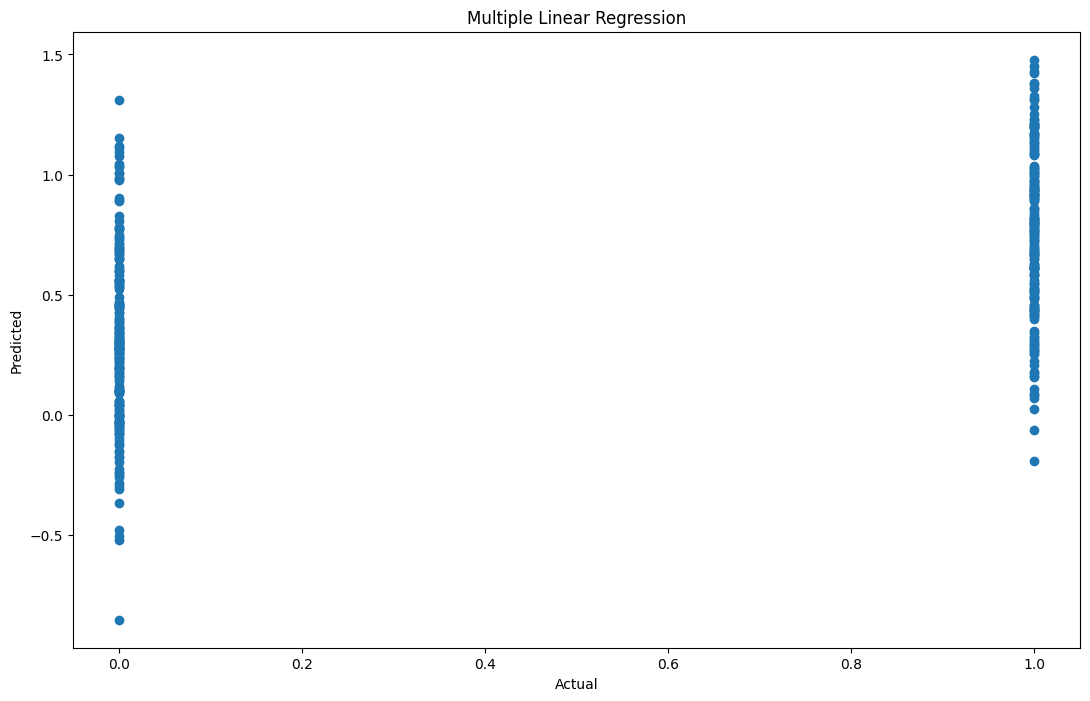

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.scatter(y_test,yelp_ml_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')

**Conclusion:** Out of two model(Logistic and Linear regression) the accuracy of Logistic Regression Model is accurate.